# Computer feature extraction : 
### Histogram
### hu moments (scale and rotate) ==> before must convert image to grayScale
### Haralics

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as PLT
import seaborn as SB
from urllib import request
import os
import tarfile
from glob import glob
import cv2 as cv
import mahotas
import os
from sklearn.preprocessing import StandardScaler

In [2]:
categories = [
    'Buttercup','Colts’Foot','Daffodil','Daisy','Dandelion','Fritillary','Iris',
    'Pansy','Sunflower','Windflower','Snowdrop','LilyValley','Bluebell','Crocus','Tigerlily',
    'Tulip','Cowslip'
]

In [3]:
# filename, _ = request.urlretrieve('https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz','17flowers.tgz')

In [4]:
# os.stat(filename)

In [5]:
# tar = tarfile.open('17flowers.tgz')
# tar.extractall(path='../../datasets/17flowers/train_data/')
# tar.close()

In [6]:
# images_path = sorted(glob('../../datasets/17flowers/train_data/jpg/*.jpg'))

In [7]:
# for cat_index, cat_name in enumerate(categories):
#     cat_dir = f'../../datasets/17flowers/train_data/{cat_name}/'
#     os.makedirs(cat_dir)
#     for i, image_path in enumerate(images_path[cat_index*80:(cat_index*80)+80],start=1):
#         filename = image_path.split('/')[-1]
#         os.rename(image_path,f'{cat_dir}{i}.jpg')

In [8]:
img = cv.imread('../../datasets/17flowers/train_data/Bluebell/1.jpg')

In [33]:
imgHist = cv.calcHist([img],[0],None,[256],[0,256])

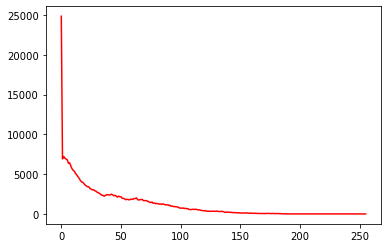

In [34]:
PLT.plot(imgHist,c='red')

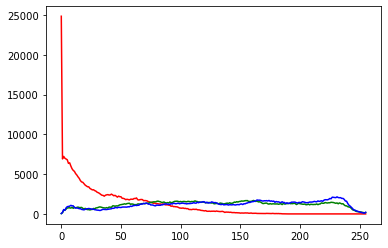

In [36]:
for channel,color in enumerate(['red','green','blue']):
    imgHist = cv.calcHist([img],[channel],None,[256],[0,256])
    PLT.plot(imgHist,c=color)

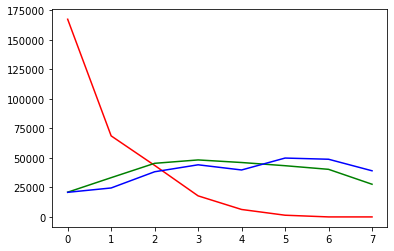

In [38]:
for channel,color in enumerate(['red','green','blue']):
    imgHist = cv.calcHist([img],[channel],None,[8],[0,256])
    PLT.plot(imgHist,c=color)

In [14]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_humoments = cv.HuMoments(cv.moments(img_gray)).flatten()
img_haralik = mahotas.features.haralick(img_gray).mean(axis=0)

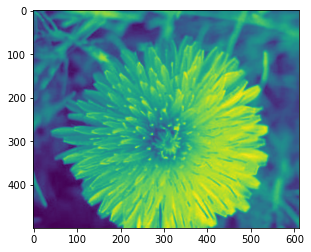

In [15]:
PLT.imshow(img_gray)

In [115]:
labels = os.listdir('../../datasets/17flowers/train_data/')
labels.sort()

In [121]:
X = []
Y = []
for label in labels:
    label_dir = os.path.join('../../datasets/17flowers/train_data/',label)
    print(label+' : ')
    for i in range(1,81):
        print(i)
        imgfile = os.path.join(label_dir,f'{i}.jpg')
        image = cv.imread(imgfile)
        image = cv.resize(image,(500,500))
        image = cv.cvtColor(image,cv.COLOR_BGR2HSV)
        
        histogram = cv.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
        cv.normalize(histogram,histogram)
        image_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

        histogram = histogram.flatten()
        humoments_features = cv.HuMoments(cv.moments(img_gray)).flatten()
        haralik_features = mahotas.features.haralick(img_gray).mean(axis=0)
        sum_of_features = np.hstack([histogram,humoments_features,haralik_features])
        X.append(sum_of_features)
        Y.append(label)

Bluebell : 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Buttercup : 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Colts’Foot : 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Cowslip : 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Crocus : 
1
2
3
4
5
6
7
8


In [122]:
DF = pd.concat([pd.DataFrame(Y,columns=['label']),pd.DataFrame(X)],axis=1)
DF.head()

,label,0,1,2,3,4,5,6,7,8,...,522,523,524,525,526,527,528,529,530,531
0,Bluebell,0.004852,0.000000,0.000978,0.028247,0.020404,0.010758,0.001841,0.000000,0.000863,...,3349.59915,0.308697,247.559285,13362.153639,8.7577,12.006016,0.000513,3.485709,-0.45352,0.999509
1,Bluebell,0.000202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001298,...,3349.59915,0.308697,247.559285,13362.153639,8.7577,12.006016,0.000513,3.485709,-0.45352,0.999509
2,Bluebell,0.167655,0.000000,0.000000,0.000000,0.000000,0.000024,0.000494,0.000423,0.042161,...,3349.59915,0.308697,247.559285,13362.153639,8.7577,12.006016,0.000513,3.485709,-0.45352,0.999509
3,Bluebell,0.003538,0.000175,0.000148,0.001009,0.002004,0.000040,0.000013,0.000000,0.001305,...,3349.59915,0.308697,247.559285,13362.153639,8.7577,12.006016,0.000513,3.485709,-0.45352,0.999509
4,Bluebell,0.000080,0.000040,0.000139,0.001055,0.003346,0.004142,0.000996,0.000518,0.000339,...,3349.59915,0.308697,247.559285,13362.153639,8.7577,12.006016,0.000513,3.485709,-0.45352,0.999509


In [123]:
DF.to_csv('image_DF.csv',index=False)

In [124]:
DF  = pd.read_csv('./image_DF.csv')
X = DF[DF.columns.difference(['label'])]
Y = DF['label']

In [125]:
X.head()

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,0.004852,0.000000,0.065814,0.000671,0.000997,0.000460,0.001381,0.033290,0.035860,0.023299,...,0.021631,0.010681,0.000460,0.000000,0.000000,0.000000,0.019330,0.028343,0.036109,0.005542
1,0.000202,0.000000,0.000034,0.000792,0.000067,0.000000,0.000000,0.077998,0.367235,0.129228,...,0.064766,0.021324,0.001517,0.000185,0.000034,0.000000,0.038671,0.177001,0.143236,0.013300
2,0.167655,0.000000,0.000047,0.012455,0.001481,0.000611,0.008037,0.077365,0.163190,0.068810,...,0.014124,0.044793,0.050033,0.003079,0.000729,0.002468,0.095296,0.069022,0.033606,0.032502
3,0.003538,0.000175,0.001910,0.002583,0.001574,0.000135,0.000175,0.107678,0.120162,0.054296,...,0.051996,0.052884,0.005879,0.001897,0.000175,0.000135,0.056234,0.066915,0.073050,0.016803
4,0.000080,0.000040,0.001215,0.026605,0.000378,0.000100,0.000040,0.018560,0.157241,0.261213,...,0.118887,0.129222,0.025908,0.000617,0.000040,0.000020,0.006233,0.088518,0.179525,0.179685


In [155]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import metrics
from catboost import Pool, CatBoostClassifier

In [157]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [158]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
encoder.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [159]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size=.10)

In [160]:
randomforest = RandomForestClassifier(
random_state=3020,
    n_estimators=800,
)
randomforest.fit(X_train,Y_train)

Y_predicted = randomforest.predict(X_test)
print(metrics.classification_report(Y_test,Y_predicted))
# print(metrics.confusion_matrix(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.57      0.57      0.57         7
           2       0.58      0.88      0.70         8
           3       0.88      0.88      0.88         8
           4       0.50      1.00      0.67         8
           5       0.56      0.62      0.59         8
           6       0.83      0.71      0.77         7
           7       0.57      0.57      0.57         7
           8       0.83      0.38      0.53        13
           9       0.67      1.00      0.80         4
          10       0.80      1.00      0.89         8
          11       0.50      0.20      0.29         5
          12       1.00      0.92      0.96        13
          13       1.00      0.75      0.86        12
          14       0.67      0.67      0.67         6
          15       0.75      1.00      0.86         6
          16       0.67      0.67      0.67         6

    accuracy              

In [162]:
grboost = GradientBoostingClassifier(
    random_state=3020,
    
)
grboost.fit(X_train,Y_train)

Y_predicted = grboost.predict(X_test)
print(metrics.classification_report(Y_test,Y_predicted))
# print(metrics.confusion_matrix(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.33      0.29      0.31         7
           2       0.62      0.62      0.62         8
           3       0.83      0.62      0.71         8
           4       0.44      0.50      0.47         8
           5       0.45      0.62      0.53         8
           6       0.80      0.57      0.67         7
           7       0.42      0.71      0.53         7
           8       0.83      0.38      0.53        13
           9       0.75      0.75      0.75         4
          10       0.73      1.00      0.84         8
          11       0.23      0.60      0.33         5
          12       1.00      0.62      0.76        13
          13       1.00      0.75      0.86        12
          14       0.80      0.67      0.73         6
          15       0.67      1.00      0.80         6
          16       0.57      0.67      0.62         6

    accuracy              

In [163]:
xgbCL = xgb.XGBClassifier(
    random_state=3020,
)
xgbCL.fit(X_train,Y_train)

Y_predicted = xgbCL.predict(X_test)
print(metrics.classification_report(Y_test,Y_predicted))
# print(metrics.confusion_matrix(Y_test,Y_predicted))

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.83      0.71      0.77         7
           2       0.58      0.88      0.70         8
           3       0.88      0.88      0.88         8
           4       0.46      0.75      0.57         8
           5       0.75      0.75      0.75         8
           6       0.86      0.86      0.86         7
           7       0.62      0.71      0.67         7
           8       0.83      0.38      0.53        13
           9       0.75      0.75      0.75         4
          10       0.73      1.00      0.84         8
          11       0.29      0.40      0.33         5
          12       1.00      0.92      0.96 

In [156]:
catCL = CatBoostClassifier(
    random_state=3020,
    verbose=True
)
catCL.fit(X_train,Y_train)

Y_predicted = catCL.predict(X_test)
print(metrics.classification_report(Y_test,Y_predicted))
# print(metrics.confusion_matrix(Y_test,Y_predicted))

Learning rate set to 0.079947
0:	learn: 2.7411172	total: 1.07s	remaining: 17m 50s
1:	learn: 2.6664636	total: 2.16s	remaining: 17m 58s
2:	learn: 2.5906312	total: 3.19s	remaining: 17m 38s
3:	learn: 2.5224989	total: 4.25s	remaining: 17m 37s
4:	learn: 2.4472212	total: 5.25s	remaining: 17m 25s
5:	learn: 2.3874328	total: 6.32s	remaining: 17m 26s
6:	learn: 2.3401464	total: 7.28s	remaining: 17m 13s
7:	learn: 2.2975632	total: 8.36s	remaining: 17m 16s
8:	learn: 2.2598543	total: 9.34s	remaining: 17m 8s
9:	learn: 2.2146014	total: 10.3s	remaining: 16m 57s
10:	learn: 2.1667123	total: 11.3s	remaining: 16m 58s
11:	learn: 2.1310964	total: 12.3s	remaining: 16m 51s
12:	learn: 2.0914098	total: 13.2s	remaining: 16m 45s
13:	learn: 2.0572243	total: 14.2s	remaining: 16m 42s
14:	learn: 2.0227195	total: 15.2s	remaining: 16m 39s
15:	learn: 1.9862336	total: 16.3s	remaining: 16m 42s
16:	learn: 1.9540823	total: 17.3s	remaining: 16m 43s
17:	learn: 1.9201798	total: 18.4s	remaining: 16m 44s
18:	learn: 1.8883412	total:

153:	learn: 0.6620221	total: 2m 33s	remaining: 14m 5s
154:	learn: 0.6583409	total: 2m 34s	remaining: 14m 4s
155:	learn: 0.6541120	total: 2m 35s	remaining: 14m 3s
156:	learn: 0.6516321	total: 2m 36s	remaining: 14m 2s
157:	learn: 0.6491501	total: 2m 37s	remaining: 14m 1s
158:	learn: 0.6472094	total: 2m 38s	remaining: 14m
159:	learn: 0.6428299	total: 2m 39s	remaining: 13m 59s
160:	learn: 0.6397749	total: 2m 40s	remaining: 13m 58s
161:	learn: 0.6368297	total: 2m 41s	remaining: 13m 57s
162:	learn: 0.6351960	total: 2m 42s	remaining: 13m 56s
163:	learn: 0.6332204	total: 2m 43s	remaining: 13m 55s
164:	learn: 0.6323759	total: 2m 44s	remaining: 13m 54s
165:	learn: 0.6301916	total: 2m 45s	remaining: 13m 53s
166:	learn: 0.6281766	total: 2m 46s	remaining: 13m 52s
167:	learn: 0.6255357	total: 2m 47s	remaining: 13m 51s
168:	learn: 0.6223932	total: 2m 48s	remaining: 13m 50s
169:	learn: 0.6221837	total: 2m 49s	remaining: 13m 49s
170:	learn: 0.6194018	total: 2m 50s	remaining: 13m 48s
171:	learn: 0.61789

304:	learn: 0.4210186	total: 5m 5s	remaining: 11m 36s
305:	learn: 0.4205710	total: 5m 6s	remaining: 11m 35s
306:	learn: 0.4192244	total: 5m 7s	remaining: 11m 34s
307:	learn: 0.4183089	total: 5m 8s	remaining: 11m 33s
308:	learn: 0.4174219	total: 5m 9s	remaining: 11m 32s
309:	learn: 0.4167388	total: 5m 10s	remaining: 11m 31s
310:	learn: 0.4151871	total: 5m 11s	remaining: 11m 30s
311:	learn: 0.4148279	total: 5m 12s	remaining: 11m 29s
312:	learn: 0.4145559	total: 5m 13s	remaining: 11m 28s
313:	learn: 0.4136995	total: 5m 14s	remaining: 11m 27s
314:	learn: 0.4132918	total: 5m 15s	remaining: 11m 26s
315:	learn: 0.4123451	total: 5m 16s	remaining: 11m 25s
316:	learn: 0.4109541	total: 5m 17s	remaining: 11m 24s
317:	learn: 0.4104830	total: 5m 19s	remaining: 11m 24s
318:	learn: 0.4097645	total: 5m 20s	remaining: 11m 23s
319:	learn: 0.4088962	total: 5m 21s	remaining: 11m 22s
320:	learn: 0.4080299	total: 5m 22s	remaining: 11m 21s
321:	learn: 0.4068299	total: 5m 23s	remaining: 11m 20s
322:	learn: 0.4

455:	learn: 0.3136227	total: 7m 40s	remaining: 9m 9s
456:	learn: 0.3131573	total: 7m 41s	remaining: 9m 8s
457:	learn: 0.3128800	total: 7m 42s	remaining: 9m 7s
458:	learn: 0.3125506	total: 7m 43s	remaining: 9m 6s
459:	learn: 0.3122407	total: 7m 44s	remaining: 9m 5s
460:	learn: 0.3118547	total: 7m 45s	remaining: 9m 4s
461:	learn: 0.3113811	total: 7m 46s	remaining: 9m 3s
462:	learn: 0.3113214	total: 7m 47s	remaining: 9m 2s
463:	learn: 0.3108370	total: 7m 48s	remaining: 9m 1s
464:	learn: 0.3107795	total: 7m 49s	remaining: 9m
465:	learn: 0.3103296	total: 7m 50s	remaining: 8m 59s
466:	learn: 0.3093173	total: 7m 51s	remaining: 8m 58s
467:	learn: 0.3089905	total: 7m 53s	remaining: 8m 57s
468:	learn: 0.3084286	total: 7m 54s	remaining: 8m 56s
469:	learn: 0.3080372	total: 7m 55s	remaining: 8m 55s
470:	learn: 0.3074832	total: 7m 56s	remaining: 8m 54s
471:	learn: 0.3071697	total: 7m 57s	remaining: 8m 53s
472:	learn: 0.3064471	total: 7m 58s	remaining: 8m 52s
473:	learn: 0.3054754	total: 7m 59s	remai

608:	learn: 0.2411111	total: 10m 46s	remaining: 6m 55s
609:	learn: 0.2406265	total: 10m 48s	remaining: 6m 54s
610:	learn: 0.2401516	total: 10m 49s	remaining: 6m 53s
611:	learn: 0.2392996	total: 10m 50s	remaining: 6m 52s
612:	learn: 0.2387945	total: 10m 51s	remaining: 6m 51s
613:	learn: 0.2386335	total: 10m 52s	remaining: 6m 50s
614:	learn: 0.2383185	total: 10m 54s	remaining: 6m 49s
615:	learn: 0.2380854	total: 10m 55s	remaining: 6m 48s
616:	learn: 0.2379360	total: 10m 56s	remaining: 6m 47s
617:	learn: 0.2377692	total: 10m 57s	remaining: 6m 46s
618:	learn: 0.2373809	total: 10m 58s	remaining: 6m 45s
619:	learn: 0.2372183	total: 11m	remaining: 6m 44s
620:	learn: 0.2368375	total: 11m 1s	remaining: 6m 43s
621:	learn: 0.2366495	total: 11m 2s	remaining: 6m 42s
622:	learn: 0.2364111	total: 11m 3s	remaining: 6m 41s
623:	learn: 0.2362234	total: 11m 5s	remaining: 6m 40s
624:	learn: 0.2355593	total: 11m 6s	remaining: 6m 39s
625:	learn: 0.2351401	total: 11m 7s	remaining: 6m 38s
626:	learn: 0.234732

759:	learn: 0.1928405	total: 13m 49s	remaining: 4m 21s
760:	learn: 0.1925949	total: 13m 50s	remaining: 4m 20s
761:	learn: 0.1924481	total: 13m 52s	remaining: 4m 19s
762:	learn: 0.1920295	total: 13m 53s	remaining: 4m 18s
763:	learn: 0.1917158	total: 13m 54s	remaining: 4m 17s
764:	learn: 0.1911929	total: 13m 55s	remaining: 4m 16s
765:	learn: 0.1910477	total: 13m 56s	remaining: 4m 15s
766:	learn: 0.1909366	total: 13m 58s	remaining: 4m 14s
767:	learn: 0.1906225	total: 13m 59s	remaining: 4m 13s
768:	learn: 0.1902442	total: 14m	remaining: 4m 12s
769:	learn: 0.1897821	total: 14m 1s	remaining: 4m 11s
770:	learn: 0.1897232	total: 14m 2s	remaining: 4m 10s
771:	learn: 0.1894398	total: 14m 4s	remaining: 4m 9s
772:	learn: 0.1891577	total: 14m 5s	remaining: 4m 8s
773:	learn: 0.1886890	total: 14m 6s	remaining: 4m 7s
774:	learn: 0.1885746	total: 14m 7s	remaining: 4m 6s
775:	learn: 0.1883797	total: 14m 8s	remaining: 4m 5s
776:	learn: 0.1881694	total: 14m 10s	remaining: 4m 4s
777:	learn: 0.1880407	total

910:	learn: 0.1565793	total: 16m 52s	remaining: 1m 38s
911:	learn: 0.1564868	total: 16m 53s	remaining: 1m 37s
912:	learn: 0.1560968	total: 16m 54s	remaining: 1m 36s
913:	learn: 0.1557909	total: 16m 56s	remaining: 1m 35s
914:	learn: 0.1557069	total: 16m 57s	remaining: 1m 34s
915:	learn: 0.1552914	total: 16m 58s	remaining: 1m 33s
916:	learn: 0.1550568	total: 16m 59s	remaining: 1m 32s
917:	learn: 0.1549002	total: 17m 1s	remaining: 1m 31s
918:	learn: 0.1548095	total: 17m 2s	remaining: 1m 30s
919:	learn: 0.1546445	total: 17m 3s	remaining: 1m 29s
920:	learn: 0.1542971	total: 17m 4s	remaining: 1m 27s
921:	learn: 0.1542683	total: 17m 5s	remaining: 1m 26s
922:	learn: 0.1539665	total: 17m 7s	remaining: 1m 25s
923:	learn: 0.1538693	total: 17m 8s	remaining: 1m 24s
924:	learn: 0.1537623	total: 17m 9s	remaining: 1m 23s
925:	learn: 0.1536787	total: 17m 10s	remaining: 1m 22s
926:	learn: 0.1532444	total: 17m 12s	remaining: 1m 21s
927:	learn: 0.1531537	total: 17m 13s	remaining: 1m 20s
928:	learn: 0.1530